In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/PCA.txt', header=None)
df

,0,1,2,3,4
0,1,2,3,4,5
1,1,2,3,4,5
2,2,4,5,2,5
3,3,4,6,7,3
4,2,3,6,2,6
5,4,6,8,3,8


In [5]:
def col_Normalization(df):
    for i in df.columns:
        dt = df[i].values
        
        mean = dt.mean()
        std = dt.std()
        df[i] = (df[i]-mean)/std
    return df

X = col_Normalization(df)
X

,0,1,2,3,4
0,-1.093216,-1.083473,-1.222937,0.196116,-0.223607
1,-1.093216,-1.083473,-1.222937,0.196116,-0.223607
2,-0.156174,0.361158,-0.094072,-0.980581,-0.223607
3,0.780869,0.361158,0.470360,1.961161,-1.565248
4,-0.156174,-0.361158,0.470360,-0.980581,0.447214
5,1.717911,1.805788,1.599225,-0.392232,1.788854


In [6]:
def cov(X):
    C = np.matrix(X).T * np.matrix(X)/np.matrix(X).shape[0]

    return C

C = cov(X)
C

matrix([[ 1.        ,  0.95885669,  0.95495346,  0.12251278,  0.38413666],
        [ 0.95885669,  1.        ,  0.91732082, -0.07082882,  0.48454371],
        [ 0.95495346,  0.91732082,  1.        , -0.09224527,  0.48380864],
        [ 0.12251278, -0.07082882, -0.09224527,  1.        , -0.67971996],
        [ 0.38413666,  0.48454371,  0.48380864, -0.67971996,  1.        ]])

In [7]:
def features(C):
    U, S, V = np.linalg.svd(C)
    return U, S, V

u, s, v = features(C)
u, s, v

(matrix([[-0.52393307,  0.28386112,  0.03104995,  0.01486618, -0.80232905],
         [-0.53673761,  0.14223955, -0.14907607, -0.72374449,  0.38164235],
         [-0.5368449 ,  0.13026768, -0.25271998,  0.68650097,  0.39959594],
         [ 0.12366616,  0.76249286,  0.59639546,  0.04760224,  0.21297372],
         [-0.36593867, -0.54847584,  0.74649668,  0.04922751,  0.07471612]]),
 array([3.20015910e+00, 1.50557241e+00, 2.12379014e-01, 8.18894690e-02,
        5.59441469e-17]),
 matrix([[-0.52393307, -0.53673761, -0.5368449 ,  0.12366616, -0.36593867],
         [ 0.28386112,  0.14223955,  0.13026768,  0.76249286, -0.54847584],
         [ 0.03104995, -0.14907607, -0.25271998,  0.59639546,  0.74649668],
         [ 0.01486618, -0.72374449,  0.68650097,  0.04760224,  0.04922751],
         [ 0.80232905, -0.38164235, -0.39959594, -0.21297372, -0.07471612]]))

In [17]:
def projection(X, P, k):
    choose = P[:,:k]
    return np.dot(X, choose)

X_reduced = projection(X, u, 2)
X_reduced = pd.DataFrame(data=X_reduced, columns=['Principal Component 1', 'Principal Component 2'])
X_reduced

,Principal Component 1,Principal Component 2
0,1.916920,-0.351563
1,1.916920,-0.351563
2,-0.100958,-0.630258
3,-0.040167,2.688174
4,-0.261757,-1.027401
5,-3.430958,-0.327388


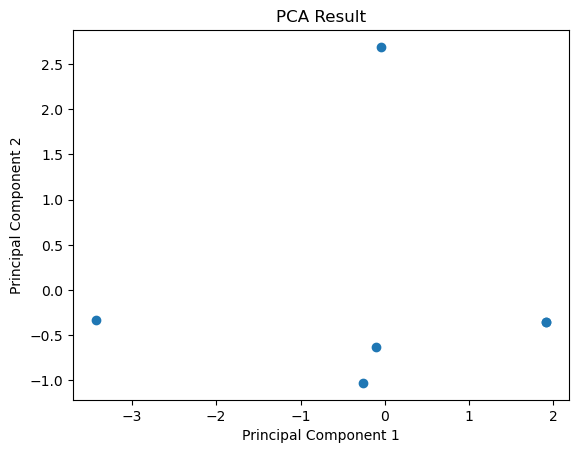

In [18]:
plt.scatter(X_reduced['Principal Component 1'], X_reduced['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

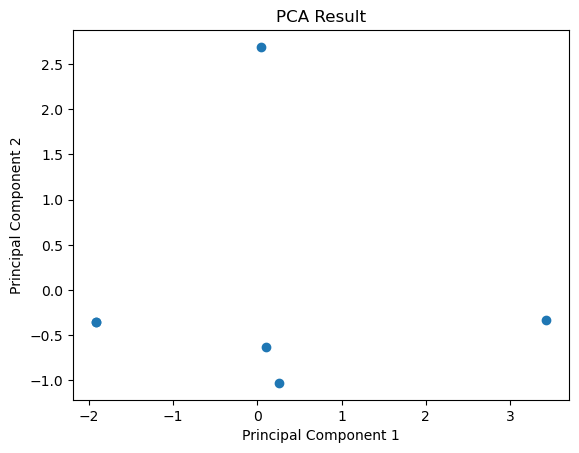

In [1]:
# Generated by GPT
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv('data/PCA.txt', header=None)  # 如果文件没有列名，需要设置header=None

# 2. 标准化数据
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 3. 使用PCA进行降维
# 假设你希望降到2维，你可以调整n_components的值
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# 4. 将PCA结果转换为DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# 5. 可视化PCA结果（仅用于二维降维）
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()
